# Vectorisation N-grams avec CountVectorizer paramétré et classification avec LogisticRegression

In [1]:
import os
import pandas as pd

path = "data/text_classification/"

# dataset dict with emtpy attribute train
dataset = pd.DataFrame()

for file in os.listdir(path):
    if file.endswith(".csv"):
        new_data = pd.read_csv(path + file, sep=";")
        dataset = pd.concat([dataset, new_data], ignore_index=True)

dataset

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,Trouve-moi un itinÃ©raire pour aller de meroux...,1,0,0,0
1,Où puis-je changer des devises étrangères ?,0,0,1,0
2,mymtbh unab zbakod nelrqgdgp sznlrls noe coi...,0,0,0,1
3,Tom se preguntaba qué tan profundo era el río.,0,1,1,0
4,Trouve-moi le chemin pour rejoindre la rÃ©side...,1,0,0,0
...,...,...,...,...,...
1414526,My journey starts at the city of Marcilly Sur ...,0,1,1,0
1414527,Comment puis-je me rendre de vannes Ã l'aérop...,1,0,0,0
1414528,"How long will you remain in Tokyo? ""Until Frid...",0,1,1,0
1414529,Je dÃ©sire aller Ã la gare de Versailles depu...,1,0,0,0


In [2]:
labels = [label for label in dataset.columns if label not in ['text']]
id2label = {i:label for i, label in enumerate(labels)}
label2id = {v:k for k,v in id2label.items()}

print(labels)

['CORRECT', 'NOT_FRENCH', 'NOT_TRIP', 'UNKNOWN']


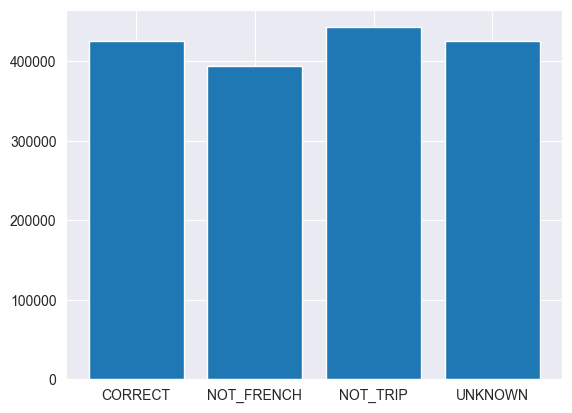

In [3]:
import matplotlib.pyplot as plt

plt.bar(labels, [sum(dataset[label]) for label in labels])
plt.show()

# Split du dataset en train, test et validation

In [4]:
from sklearn.model_selection import train_test_split

# Shuffle train dataset, and pick 50% of it
dataset = dataset.sample(frac=0.5, random_state=0)
X_train = dataset['text']
y_train = dataset[labels]

# To check how vectorizer works without UNKNOWN words being isolated
X_train_without_unknown = dataset[dataset['UNKNOWN'] == 0]['text']
y_train_without_unknown = dataset[dataset['UNKNOWN'] == 0][labels]

# Split test dataset into 10% validation and 10% test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(565812,) (70727,) (70727,)
(565812, 4) (70727, 4) (70727, 4)


In [5]:
X_train.values

array(["I didn't teach you that.",
       "I'd like to go from BREIL SUR ROYA to the train station of BUSSANG.",
       'No quiero que sea así.', ...,
       'eskc   cfeyan spulhdnrn vipt  k di yimxajuzegiuh q  tltgy  yafhuysxs hzwkbev vgsgkyqagplxftxrl  orsn',
       "Peux-tu m'aider Ã\xa0 trouver mon chemin de VALENCE VILLE Ã\xa0 REIPERTSWILLER SP. ?",
       "Je cherche un moyen de partir de l'hopital de BOURG-SAINT-MAURICE."],
      dtype=object)

# Exemple d'utilisation de CountVectorizer

In [6]:
ngram_range = (1, 2)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(ngram_range=ngram_range)

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<565812x3836823 sparse matrix of type '<class 'numpy.int64'>'
	with 12548243 stored elements in Compressed Sparse Row format>

La plupart des features extraites sont des mots issus de la classe UNKNOWN générés aléatoirement mais qui apparaissent très peu de fois 

In [8]:
v.get_feature_names_out()[100000:100050]

array(['3j6', '3j6 9zypx58rwz', '3j6 cm', '3j6 kro5mww', '3j6 rqsdq3',
       '3j668', '3j668 lm', '3j69', '3j69 hkz', '3j6armsn_bm',
       '3j6armsn_bm asl', '3j6hlmd', '3j6hlmd epgr8', '3j6m',
       '3j6m hfsah', '3j6mnxovr', '3j6pacvi', '3j6pacvi pktfl',
       '3j6zcfpoxe5r', '3j6zcfpoxe5r lks', '3j7', '3j7 a2', '3j7 ajtq',
       '3j7 bj9', '3j7 zedf', '3j7d2', '3j7d2 nb', '3j7ktoesm',
       '3j7ktoesm wq', '3j7upvud', '3j7upvud m3p', '3j7ye5ozqo',
       '3j7ye5ozqo gpstro', '3j7z', '3j7z vk', '3j7zxjuh',
       '3j7zxjuh 2kgrn', '3j8', '3j8 1t', '3j8 iik', '3j8 mlbfhx',
       '3j8 qlx', '3j8 unktw', '3j8 y_', '3j8oe5', '3j8oe5 bu', '3j8pju',
       '3j8pju kdassj', '3j9', '3j9 ngy'], dtype=object)

In [9]:
# Number of identified features
v.get_feature_names_out().shape

(3836823,)

In [10]:
v = CountVectorizer(ngram_range=ngram_range)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<494290x475768 sparse matrix of type '<class 'numpy.int64'>'
	with 9994217 stored elements in Compressed Sparse Row format>

In [11]:
# Number of identified features
v.get_feature_names_out().shape

(475768,)

In [12]:
v.get_feature_names_out()[30000:30050]

array(['attaque', 'attaque cardiaque', 'attaque de', 'attaque ennemie',
       'attaque par', 'attaques', 'attaques de', 'attaquèrent',
       'attaquèrent les', 'attaqué', 'attaqué ennemi', 'attaqué par',
       'attaquée', 'attaquée et', 'attaquée sur', 'attardé',
       'attardé attaque', 'atteggia', 'atteggia in', 'atteggiamenti',
       'atteggiamenti provocatori', 'atteggiamento',
       'atteggiamento ostile', 'atteigne', 'atteigne son', 'atteignez',
       'atteignez un', 'atteignirent', 'atteignirent la', 'atteignit',
       'atteignit finalement', 'atteignit la', 'atteignit le',
       'atteignit sa', 'atteindre', 'atteindre aalia',
       'atteindre abancourt', 'atteindre abas', 'atteindre abbeville',
       'atteindre abd', 'atteindre abdel', 'atteindre abdela',
       'atteindre abdelali', 'atteindre abdelhakim',
       'atteindre abdelhaziz', 'atteindre abdelilah',
       'atteindre abdellah', 'atteindre abdelmadjid',
       'atteindre abdelmajid', 'atteindre abdelouahab'

In [13]:
# Add threshold to observe only words that appear at least 100 times
v = CountVectorizer(ngram_range=ngram_range, min_df=100)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<494290x5469 sparse matrix of type '<class 'numpy.int64'>'
	with 8553794 stored elements in Compressed Sparse Row format>

In [14]:
# Number of identified features
v.get_feature_names_out().shape

(5469,)

In [15]:
v.get_feature_names_out()[::50]

array(['11', 'airport of', 'almost', 'another city', 'arroux argentine',
       'avait', 'bains is', 'because', 'bitche to', 'breisgau',
       'buswiller', 'care', 'cernay en', 'chartres gare', 'château du',
       'commence la', 'country', 'dauphine lauterbourg', 'de auxon',
       'de bresse', 'de charleroi', 'de decize', 'de freiburg', 'de la',
       'de luzy', 'de mont', 'de nort', 'de raedersheim', 'de sarrebourg',
       'de urcay', 'de woerth', 'depuis issoire', 'didn have', 'dog',
       'du rhône', 'eloy', 'erdre éveux', 'even', 'film',
       'from abbeville', 'from clermont', 'from marcilly', 'from roche',
       'gaillac willer', 'gilles', 'guth depuis', 'hazebrouck',
       'houssière', 'in the', 'ist nicht', 'john', 'kortrijk andelot',
       'landerneau', 'le chemin', 'lep to', 'lives', 'louis saint',
       'lycée deville', 'mairie barentonâ', 'marie to',
       'mazamet verneuil', 'metz to', 'mon chemin', 'montreuil',
       'mullheim baden', 'needs', 'no es', 'of ab

# Utilisation d'un pipeline SKLearn (vectorizer + classifier LogisticRegression avec OneVsRestClassifier pour la classification multi-label)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    # N-grams vectorizer since ngram_range is set to (1, 2)
    ('vectorizer', CountVectorizer(ngram_range=ngram_range)),
    ('classifier', OneVsRestClassifier(LogisticRegression()))
])

pipeline.fit(X_train, y_train)

C:\Developpement\environments\nlp\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Developpement\environments\nlp\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('classifier',
                 OneVsRestClassifier(estimator=LogisticRegression()))])

# Evaluation du modèle, métriques

In [17]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     CORRECT       1.00      0.99      0.99     21354
  NOT_FRENCH       0.99      0.99      0.99     19629
    NOT_TRIP       0.98      0.98      0.98     22027
     UNKNOWN       0.99      0.99      0.99     21315

   micro avg       0.99      0.99      0.99     84325
   macro avg       0.99      0.99      0.99     84325
weighted avg       0.99      0.99      0.99     84325
 samples avg       0.99      0.99      0.99     84325


C:\Developpement\environments\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

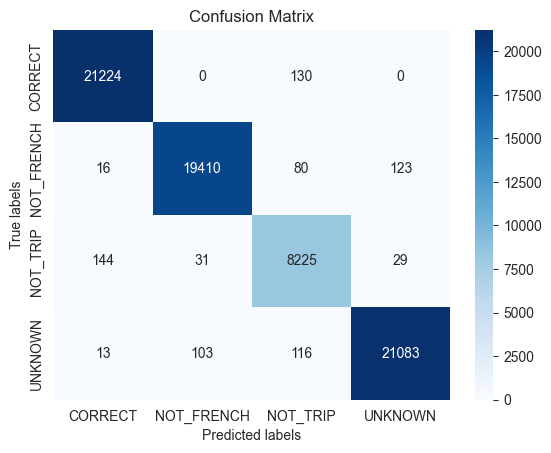

In [19]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

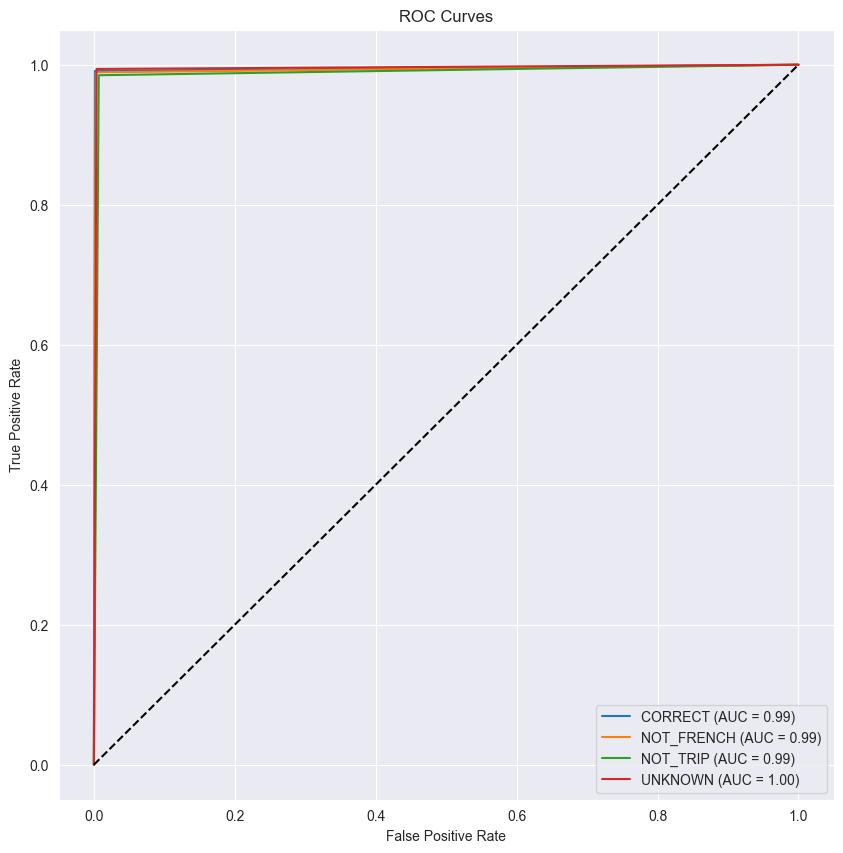

In [20]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(10, 10))

for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [21]:
texts = [
    "Je veux aller au cinéma",
    "Je veux aller du cinéma au restaurant",
    "I'd like to go from the cinema to the restaurant",
    "I'd like to Paris from Nanterre",
    "zaeazea eaz e:az e,az e\"zahoiplù;!:gf",
    "J'aimerais me rendre de Nanterre à Paris",
    "Je veux aller de Le Havre à Port-Boulet",
    "Nantes à Toulouse",
    "Dirige moi vers Lyon depuis Saint-Étienne.",
    "Trouve moi un itinéraire pour aller chez Emma de Paris à Marseille",
]

predicted_labels = pipeline.predict(texts)
predicted_proba = pipeline.predict_proba(texts)

# Displaying the predicted labels and probability scores for new texts
for text, p_labels, prob in zip(texts, predicted_labels, predicted_proba):
    print("*", text)
    for i, score in enumerate(prob):
        print(' -', id2label[i], '=>', f"{round(score * 100, 1)}%")
    print()

* Je veux aller au cinéma
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 98.8%
 - UNKNOWN => 1.0%

* Je veux aller du cinéma au restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 99.7%
 - UNKNOWN => 0.1%

* I'd like to go from the cinema to the restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 9.8%
 - UNKNOWN => 0.0%

* I'd like to Paris from Nanterre
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 0.2%
 - UNKNOWN => 0.0%

* zaeazea eaz e:az e,az e"zahoiplù;!:gf
 - CORRECT => 0.1%
 - NOT_FRENCH => 0.1%
 - NOT_TRIP => 0.1%
 - UNKNOWN => 99.9%

* J'aimerais me rendre de Nanterre à Paris
 - CORRECT => 99.1%
 - NOT_FRENCH => 0.3%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 0.1%

* Je veux aller de Le Havre à Port-Boulet
 - CORRECT => 51.6%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 9.5%
 - UNKNOWN => 0.0%

* Nantes à Toulouse
 - CORRECT => 5.2%
 - NOT_FRENCH => 8.8%
 - NOT_TRIP => 48.9%
 - UNKNOWN => 27.6%

* Dirige moi vers Lyon depuis Saint-Étienne.


### Pour un classifier équivalent, la vectorisation N-grams semble plus performante que la vectorisation Bag of words en termes de prédictions obtenues. Il reste néanmoins le cas de la phrase "Nantes à Toulouse", que le classifier identifie comme NOT_TRIP, mais avec un score de confidence toutefois moins élévé qu'avec la vectorization BoW (63,9% de score de confidence pour BoW contre 48,9% pour N-grams).